In [7]:
# Load results
import os
import pandas as pd

results = pd.DataFrame()
result_file_list = os.listdir("./results/")
for filename in result_file_list:
    df = pd.read_csv("./results/" + filename, names = ["filename", "turn", "full_summary", "omitted_summary", "similarity"])
    results = pd.concat([results, df])


In [16]:
# Cast dtype
results = results.astype({"similarity": float, "turn": int})

results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         952 non-null    object 
 1   turn             952 non-null    int64  
 2   full_summary     952 non-null    object 
 3   omitted_summary  952 non-null    object 
 4   similarity       952 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 44.6+ KB


In [8]:
# Remove duplicates
results = results.drop_duplicates(subset=["filename", "turn"], keep="last")

#print(results)

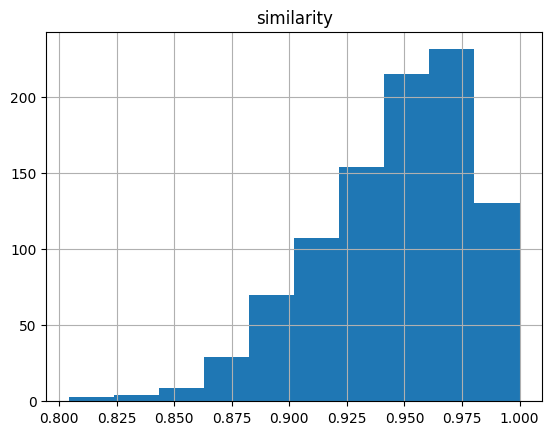

In [14]:
# Show histogram
import matplotlib

hist = results.hist()

In [15]:
# Sort by similarity
results = results.sort_values("similarity")

#print(results)

    filename turn                                       full_summary   
0   PP80.txt    3                                    A: 高校の部活に所属してた？  \
9   PP31.txt   12  A and B are discussing their love for the peac...   
3   PP93.txt    6  A asks B if they have any pets and mentions th...   
2   PP33.txt    5                Bは古本屋が好きで、本屋の匂いが懐かしく感じられて好きだと言っている。   
8   PP82.txt   11  A and B discuss their dislikes and fears, but ...   
..       ...  ...                                                ...   
2   PP18.txt    5                 Bは自分の趣味であるヨガについて言及し、Aに趣味について尋ねている。   
7   PP28.txt   10  乗馬は下半身の筋肉バランスがしっかりしていないと難しいと聞いたことがあります。れっきとしたス...   
2   PP80.txt    5  Bはゲームをあまりやらない理由として、早寝早起きがモットーで夜ご飯を食べたらすぐに寝るためだ...   
5    PP2.txt    8  AとBは自然について話しています。Aは自然が心を落ち着かせてくれると言い、海辺の写真を撮りに...   
7   PP86.txt   10  Aはお菓子作りが好きで、祖母が好きだったため、線香やマッチの残り香が懐かしく感じることがある...   

                                      omitted_summary  similarity  
0     Bは新聞配達員で、毎日新聞を読み放題できるため、新聞についてる4コマ漫画が好きだと言っている。    0.804169  

In [27]:
# Show top and bottom
def show_row(row):
    with open("./dat/" + row.filename) as f:
        dialogue = [l.rstrip() for l in f.readlines()]
    
    full_dialogue = "\n".join(dialogue[:row.turn + 1])
    print("-----------------")
    print("full dialogue")
    print(full_dialogue)
    print("full summary")
    print(row.full_summary)
    print("omitted summary")
    print(row.omitted_summary)
    print("similaryty") 
    print(row.similarity)
    return

NUM_EXAMPLES = 20
for row in results.head(NUM_EXAMPLES).itertuples():
    show_row(row)

for row in results.tail(NUM_EXAMPLES).itertuples():
    show_row(row)



-----------------
full dialogue
A: あなたって高校のとき何か部に所属してた？
B: ううん。帰宅部だったよ。あなたは？
A: わたしは漫研に入ってたんだ。あなたは漫画とか読む？
B: 漫画は、新聞についてる4コマ漫画が好き！新聞配達員をしてるから、毎日読み放題！
full summary
A: 高校の部活に所属してた？
omitted summary
Bは新聞配達員で、毎日新聞を読み放題できるため、新聞についてる4コマ漫画が好きだと言っている。
similaryty
0.8041690191340414
-----------------
full dialogue
A: こんにちは！いやあ、徳島に移住してきて本当に正解だった！いいところだね、徳島は。
B: そうなの？わたしずっと大阪在住で徳島って行ったことないんだけど阿波踊りのイメージしかないな。
A: いや、都会に比べて、全然人が少ないんだよ。それが何よりもいいところだね！
B: なるほど。それはいいかも。わたしは翻訳家なので都会の喧騒よりは落ち着いた場所で仕事をしたいしね。あなたは最近お仕事は？
A: 仕事は順調だよ。わたしがキャリアコンサルしたクライアントが、メキメキ成功しだしてるんだ！
B: それは順調だね！今度うちに来た時は大したことないけどわたしの得意料理のたこ焼きでパーティーでもしよう！
A: たこパー、いいね！たこ焼き好きってことは、関西出身だったりして！
B: ずーっと関西だよ、あなたは元々の出身はどこなの？
A: わたしは関東出身で徳島に移住したの。でも関西人って、ソースの味の違いが分かるってホント？
B: むしろわからないの？関西人には当たり前のことだよ
A: そうなんだー！文化の違いを感じる！今度、わたしのドライブに付き合ってよ！関西の話、聞かせて！
B: 行こう行こう！わたしの話は長いわよー
A: 全然オッケー！楽しみにしてるね！
full summary
A and B are discussing their love for the peacefulness of living in a less populated area, and B invites A over for a party featuring their specialty d

In [34]:
# Show graph
import matplotlib.pyplot as plt
DIALOGUE_NUMBER = 1

result = results.query(f"filename == 'PP{DIALOGUE_NUMBER}.txt'")
result = result.sort_values("turn", ascending=True)

with open(f"./dat/PP{DIALOGUE_NUMBER}.txt") as f:
    dialogue = [l.rstrip() for l in f.readlines()]

dialogue_with_line_number = []
for idx, l in enumerate(dialogue):
    dialogue_with_line_number.append(str(idx) + ". " + l)

print("\n".join(dialogue_with_line_number))

0. A: こんにちは。お元気ですか？
1. B: はい、元気です。広告代理店での仕事が忙しいですが。
2. A: お疲れさまです。私は介護福祉士をしています。
3. B: 介護福祉士として働いていらっしゃるんですね。大変なお仕事ですよね。
4. A: いえ。広告代理店も大変ですよね。ちなみに私は北海道の一軒家に住んでいます。
5. B: 北海道ですか。ご飯の美味しいところで羨ましいです。私は青森県出身で山の多いところが好きなので、山の近くに住んでいます
6. A: 北海道は、美味しいもの多いですよ。青森なら、お近くでしたね。でも、私はいつか東京に住んでみたいんです。
7. B: 東京ですか。東京には華やかな場所が多いですよね
8. A: 田舎生まれの私にとって、とても魅力的な場所です。
9. B: 私にとっても東京は魅力的な場所ですね。お休みの日は何をされていますか？私は写真が趣味です。
10. A: 私は彼氏いない歴も長くて、休みの日はひとりでのんびりしています。写真、いいですね。
11. B: 1人でのんびりと過ごす時間も大切で、贅沢なものですよ。私もよく家でのんびり過ごしています。
12. A: 一人の時間も大切ですよね。仕事も忙しいので、ゆっくりしたいですよね。
13. B: そうですね。仕事の息抜きに1人の時間も大切です。
